# 02582 Computational Data Analysis - Case 1

**Group members**:
- Raquel Moleiro Marques: s243636
- Sree Keerthi Desu: s243933

______

### Imports needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

__________

## Load datasets

In [2]:
case1_data_path = "case1Data.csv"
df = pd.read_csv(case1_data_path)
df

,y,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,375.823073,6.359019,-13.367120,-2.483750,-6.641891,11.733539,NaN,-17.085361,22.194764,16.827888,...,-10.200888,3.980048,-4.433274,-1.473723,NaN,74.0,72.0,72.0,73.0,73.0
1,266.811730,3.873664,-8.470389,-3.055012,NaN,11.420983,1.822330,-13.694100,22.738654,20.307503,...,-9.740207,NaN,-2.629314,4.816987,-12.240248,74.0,72.0,72.0,73.0,73.0
2,267.271759,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,NaN,15.963889,...,-14.501970,10.054005,NaN,NaN,-11.107921,73.0,72.0,75.0,74.0,74.0
3,219.951294,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,...,-11.086963,2.019726,-8.531959,3.520833,NaN,71.0,72.0,73.0,71.0,72.0
4,289.697954,3.116458,-8.518713,-6.796050,NaN,7.646285,-3.118309,-13.102567,22.801217,16.680208,...,-9.117422,6.627601,-2.805531,5.914351,-11.240573,72.0,72.0,72.0,74.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,179.496446,0.068763,-13.641936,-10.840247,-7.940555,6.429727,-9.573881,-14.778257,21.290921,8.128314,...,-14.104077,1.859479,-9.569323,3.104148,-15.442839,74.0,72.0,73.0,72.0,73.0
96,161.037072,1.491110,-14.347095,NaN,-8.246338,10.170677,NaN,-16.003159,23.579735,12.688034,...,-19.050006,3.847112,-6.446968,0.281087,-14.840473,72.0,72.0,73.0,71.0,73.0
97,140.437828,-3.965484,-9.453867,-9.903336,-10.641552,8.570113,NaN,-11.488808,18.958736,10.115323,...,-19.259988,NaN,-8.666655,2.843539,NaN,74.0,72.0,73.0,74.0,73.0
98,202.443713,0.709377,-9.807318,-6.803646,-4.259225,11.406617,-1.232783,-10.300590,21.074819,12.448371,...,-17.866896,NaN,-6.440458,4.119420,-10.105708,75.0,72.0,74.0,72.0,73.0


In [3]:
# splitting response and predictors from each other.
X, y = df.drop(['y'],axis=1), df['y']

In [4]:
xnew_data_path = "case1Data_Xnew.csv"
df_pred = pd.read_csv(xnew_data_path)
df_pred

,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,-0.843969,-9.104918,-5.076919,-4.222152,3.606609,-4.505494,-11.481997,16.201722,15.939470,NaN,...,-13.884702,7.465161,-4.667464,3.949705,-10.715577,73.0,72.0,73.0,75.0,73.0
1,0.802093,-10.196678,-4.500370,-7.827837,5.199002,NaN,-15.928708,20.151309,13.707194,-8.517576,...,-14.937164,5.229448,-6.927970,3.271193,-12.420893,73.0,72.0,73.0,71.0,75.0
2,4.234883,-10.798261,-0.465914,-6.054850,NaN,NaN,-16.182312,16.419564,12.152861,-6.418069,...,-11.058964,4.692879,-0.929818,NaN,-14.551448,NaN,72.0,73.0,71.0,73.0
3,7.041336,-5.169413,-4.158334,-4.270638,14.939894,0.008338,-10.556799,NaN,14.180830,NaN,...,NaN,7.460901,-2.484389,8.149697,-11.598544,72.0,72.0,74.0,75.0,75.0
4,1.135564,-12.048088,-4.828939,-6.565217,7.493100,-2.789944,-15.859234,21.560086,14.147759,-4.848519,...,-9.607803,5.654679,-3.020357,3.030958,-13.320599,72.0,72.0,71.0,74.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,-10.333885,-4.882893,-5.001330,14.740750,-7.375751,-14.269895,NaN,18.944182,-3.516163,...,-15.231878,NaN,NaN,2.773400,-8.033125,73.0,72.0,71.0,74.0,NaN
996,-0.301550,-9.275305,NaN,-9.984508,5.443650,-5.003200,-13.199856,22.410145,12.723149,-5.684371,...,-13.423383,4.090021,-5.349963,3.544913,-10.234976,72.0,72.0,73.0,74.0,NaN
997,3.671630,-6.533390,-0.489830,-5.143861,13.761843,-8.637093,NaN,24.973347,13.576836,-3.389953,...,-10.147875,8.668706,-4.411021,-0.860737,-7.109857,72.0,72.0,71.0,75.0,NaN
998,2.356294,-4.169392,-2.274090,-2.484517,10.591025,2.055309,-9.804748,15.946822,11.053100,-3.986907,...,-11.107330,4.475155,-2.621623,8.438770,-7.255016,72.0,72.0,71.0,71.0,73.0


________

## Data preparation

### Missing values

In [5]:
# Print missing values for each X column
columns_with_missing_values = X.columns[X.isnull().any()]
X_missing_values = X[columns_with_missing_values].isnull().sum()
X_missing_values

x_01    13
x_02    21
x_03    15
x_04    14
x_05    12
        ..
C_01    22
C_02    22
C_03    22
C_04    22
C_05    22
Length: 100, dtype: int64

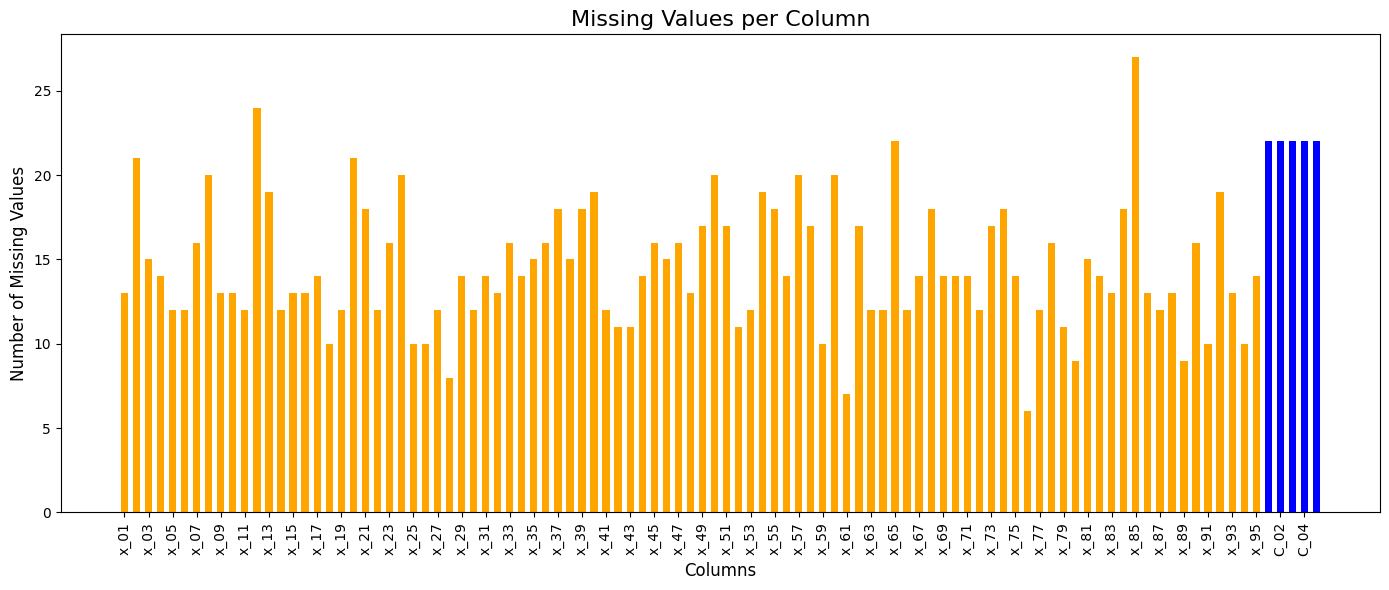

In [6]:
# Create a plot to visualize the missing values
plt.figure(figsize=(14, 6))

# Set the colors: one for columns starting with 'x' and another for columns starting with 'C'
colors = ['orange' if col.startswith('x') else 'blue' for col in X_missing_values.index]

# Adjusting the width of the bars to add more space between each column
bar_width = 0.6
plt.bar(X_missing_values.index, X_missing_values.values, color=colors, width=bar_width)

# Title and labels
plt.title('Missing Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)

# Rotate the x-axis labels and set a readable font size
plt.xticks(rotation=90, fontsize=10)

# Set the x-ticks to show every 2nd label
plt.xticks(ticks=range(0, len(X_missing_values), 2), labels=X_missing_values.index[::2], fontsize=10)

plt.tight_layout()
plt.show()

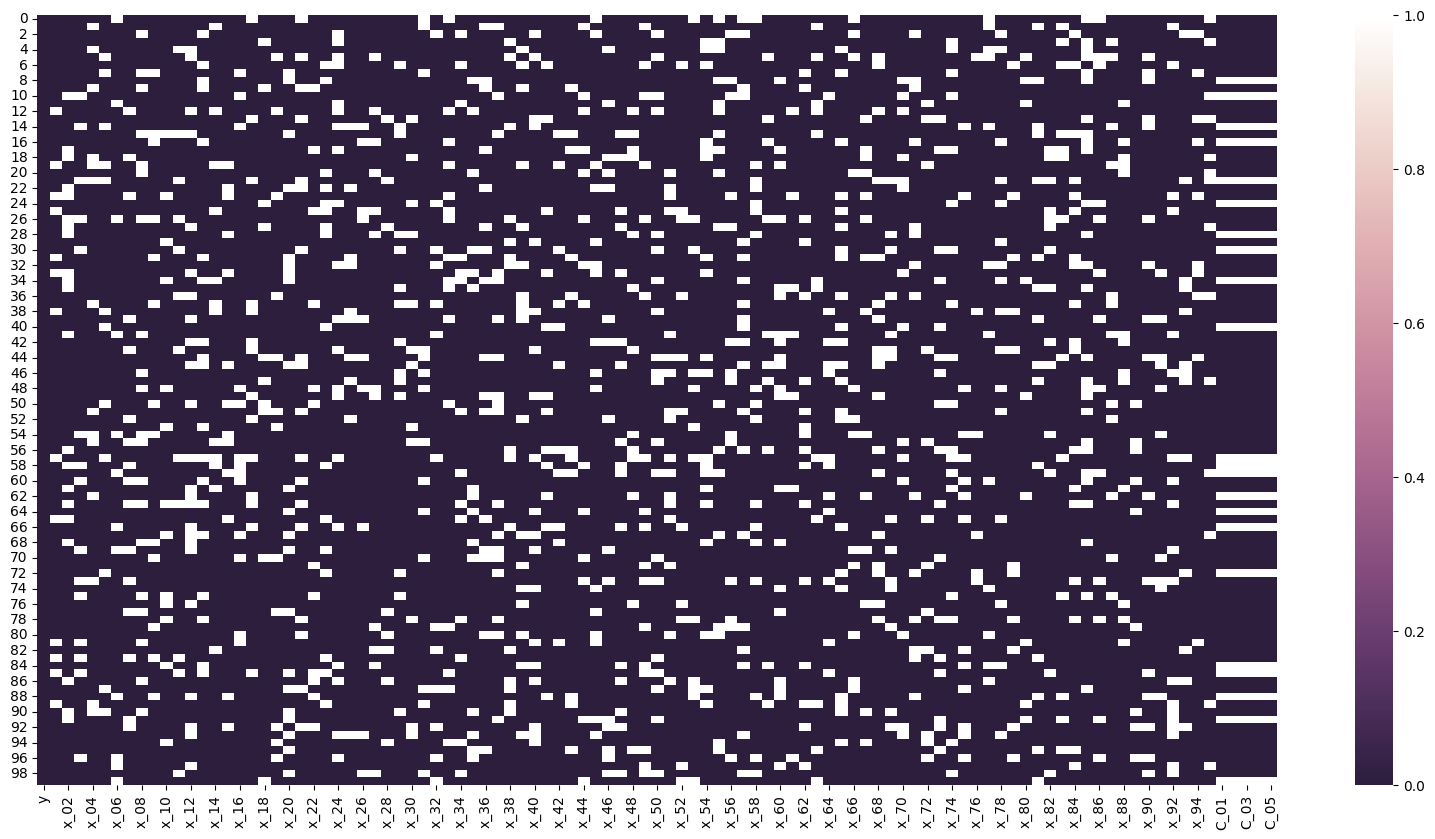

In [7]:
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap);

As it can be seen in the above, there are missing values for both the numerical and categorical variables.

Regarding numerical data, based on the book there is 3 methods to proceed, discard observations with any misisng data, rely on the the learning algorithm to deal with missing values in its training phase and impute all missing values before training. Since we believe that discarding this vast amount of data and relying on an algorithm wouldnt be ideal, we opted for the last one, as per below.

In [8]:
# Extract columns starting with 'X' for numerical data
numerical_X_columns = [col for col in X.columns if col.startswith('x')]
# Extract columns starting with 'C' for categorical data
categorical_X_columns = [col for col in X.columns if col.startswith('C')]

numerical_X_data = X[numerical_X_columns]  # Actually extracting data for numerical columns
categorical_X_data = X[categorical_X_columns]  # Actually extracting data for categorical columns

print("Numerical Data (starting with 'X'):")
print(numerical_X_data.head())

print("\nCategorical Data (starting with 'C'):")
print(categorical_X_data.head())

Numerical Data (starting with 'X'):
       x_01       x_02      x_03       x_04       x_05      x_06       x_07  \
0  6.359019 -13.367120 -2.483750  -6.641891  11.733539       NaN -17.085361   
1  3.873664  -8.470389 -3.055012        NaN  11.420983  1.822330 -13.694100   
2  5.275824 -12.070531 -1.366168  -4.819100  10.721527 -5.125992 -17.476865   
3  4.430110  -4.467975 -0.730736 -10.047104  11.498539 -2.870260 -14.033012   
4  3.116458  -8.518713 -6.796050        NaN   7.646285 -3.118309 -13.102567   

        x_08       x_09       x_10  ...       x_86       x_87      x_88  \
0  22.194764  16.827888 -10.367142  ...        NaN  20.710065 -6.390469   
1  22.738654  20.307503  -2.859097  ... -16.072898  18.705663 -7.218644   
2        NaN  15.963889  -3.257940  ... -16.792035  20.189968 -5.835787   
3  18.225190  10.409488  -5.616061  ... -16.948258        NaN -7.304078   
4  22.801217  16.680208  -3.357765  ... -13.129342  19.371188 -3.971639   

        x_89      x_90       x_91     

__________

### Handle missing numerical values

The simplest tactic in the book to impute the missing value is with the mean or median of the nonmissing values for that feature.

> However which one to choose? (According to ChatGPT:)

Choosing between **mean** and **median** imputation for numerical values depends on the nature of your data, specifically its distribution and whether it contains outliers.

1. **Use the Mean if:**
   - **The data is symmetrically distributed** (i.e., roughly a normal distribution).
   - There are **no significant outliers** that could skew the imputed values.
   - The missing data is **missing completely at random** (MCAR), meaning the missing values are not related to the value of the feature or other variables.
   
   **Why?**  
   The mean is sensitive to outliers, but if the data is symmetrically distributed without outliers, imputing with the mean tends to give a good estimate that reflects the overall central tendency of the data.

2. **Use the Median if:**
   - **The data is skewed** (i.e., not normally distributed).
   - There are **outliers** in the data.
   - You are concerned that imputation with the mean could distort the distribution due to extreme values.
   
   **Why?**  
   The median is **robust to outliers** and does not get pulled by extreme values. If your data is skewed, the median can better represent the "central" value without being overly influenced by any extreme values.

### Conclusion:
- **Use the mean** when the data is symmetric and has no outliers.
- **Use the median** when the data is skewed or contains outliers.

With that in mind I plotted the below:

In [9]:
# Number of numerical columns
num_columns_numerical = len(numerical_X_data.columns)

# Set up the plot with multiple subplots for numerical columns
fig, axes = plt.subplots(num_columns_numerical, 2, figsize=(18, num_columns_numerical * 4))

# Plot histograms and boxplots for each numerical column
for i, col in enumerate(numerical_X_data.columns):
    # Plot the histogram
    sns.histplot(numerical_X_data[col], kde=True, color='blue', bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(f'{col}')
    axes[i, 0].set_ylabel('Frequency')
    
    # Plot the boxplot
    sns.boxplot(x=numerical_X_data[col], color='green', ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(f'{col}')

    # Reduce clutter by only showing some column names
    if i % 2 == 0:  # Show label for every 2nd column
        axes[i, 0].set_xlabel(f'{col}', fontsize=10)
        axes[i, 1].set_xlabel(f'{col}', fontsize=10)
    else:
        axes[i, 0].set_xlabel('')
        axes[i, 1].set_xlabel('')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### Encoding Categorical Variables

When it comes down to categorical variables, the book also mentions how to treat missing values for categorical variables for three-based methods. It states to add a new category called "missing". Therefore we can check if there is any differences in behaviour with observations with missing values than those with nonmissing values.

In [10]:
categorical_X_data = categorical_X_data.fillna(value="Missing")
categorical_X_data

,C_01,C_02,C_03,C_04,C_05
0,74.0,72.0,72.0,73.0,73.0
1,74.0,72.0,72.0,73.0,73.0
2,73.0,72.0,75.0,74.0,74.0
3,71.0,72.0,73.0,71.0,72.0
4,72.0,72.0,72.0,74.0,75.0
...,...,...,...,...,...
95,74.0,72.0,73.0,72.0,73.0
96,72.0,72.0,73.0,71.0,73.0
97,74.0,72.0,73.0,74.0,73.0
98,75.0,72.0,74.0,72.0,73.0


___________

The same is then done for the other categorical dataset, which will be used for predictions.

In [11]:
# See where the missing values are
columns_with_missing_values = df_pred.columns[df_pred.isnull().any()]
df_pred[columns_with_missing_values].isnull().sum()

x_01    159
x_02    151
x_03    151
x_04    170
x_05    136
       ... 
C_01    162
C_02    168
C_03    144
C_04    165
C_05    154
Length: 100, dtype: int64

In [12]:
# Extract columns starting with 'X' for numerical data
numerical_pred_columns = [col for col in df_pred.columns if col.startswith('x')]
# Extract columns starting with 'C' for categorical data
categorical_pred_columns = [col for col in df_pred.columns if col.startswith('C')]

numerical_pred_data = X[numerical_pred_columns]  # Actually extracting data for numerical columns
categorical_pred_data = X[categorical_pred_columns]  # Actually extracting data for categorical columns

In [13]:
# Handle numerical misisng data for df_pref = numerical_pred_data



In [14]:
# Handling categorical misisng data for pred dataset
categorical_pred_data = categorical_pred_data.fillna(value="Missing")
categorical_pred_data

,C_01,C_02,C_03,C_04,C_05
0,74.0,72.0,72.0,73.0,73.0
1,74.0,72.0,72.0,73.0,73.0
2,73.0,72.0,75.0,74.0,74.0
3,71.0,72.0,73.0,71.0,72.0
4,72.0,72.0,72.0,74.0,75.0
...,...,...,...,...,...
95,74.0,72.0,73.0,72.0,73.0
96,72.0,72.0,73.0,71.0,73.0
97,74.0,72.0,73.0,74.0,73.0
98,75.0,72.0,74.0,72.0,73.0
